In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("top_10000_movies.csv")

In [3]:
data.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,851,651",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu..."
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,832,968",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron..."
2,Inception,(2010),8.8,UA,$292.58M,"2,515,193",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le..."
3,Fight Club,(1999),8.8,A,$37.03M,"2,287,066",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf..."
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,189,202",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ..."


In [4]:
data.shape

(10000, 11)

# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    10000 non-null  object 
 1   year          10000 non-null  object 
 2   rating        10000 non-null  float64
 3   certificate   10000 non-null  object 
 4   gross_income  10000 non-null  object 
 5   votes         10000 non-null  object 
 6   runtime       10000 non-null  object 
 7   genre         10000 non-null  object 
 8   description   10000 non-null  object 
 9   directors     10000 non-null  object 
 10  stars         9998 non-null   object 
dtypes: float64(1), object(10)
memory usage: 859.5+ KB


In [6]:
data['stars'].fillna('Not Available', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    10000 non-null  object 
 1   year          10000 non-null  object 
 2   rating        10000 non-null  float64
 3   certificate   10000 non-null  object 
 4   gross_income  10000 non-null  object 
 5   votes         10000 non-null  object 
 6   runtime       10000 non-null  object 
 7   genre         10000 non-null  object 
 8   description   10000 non-null  object 
 9   directors     10000 non-null  object 
 10  stars         10000 non-null  object 
dtypes: float64(1), object(10)
memory usage: 859.5+ KB


In [8]:
zero_values = (data =='0').sum()
zero_values

movie_name         0
year               0
rating             0
certificate        0
gross_income    2432
votes           2432
runtime            0
genre              0
description        0
directors          0
stars              0
dtype: int64

In [9]:
null_values=(data=='null').sum()
null_values

movie_name      0
year            0
rating          0
certificate     0
gross_income    0
votes           0
runtime         0
genre           0
description     0
directors       0
stars           0
dtype: int64

In [10]:
not_rated=(data=='Not Rated').sum()
not_rated

movie_name         0
year               0
rating             0
certificate     2452
gross_income       0
votes              0
runtime            0
genre              0
description        0
directors          0
stars              0
dtype: int64

In [11]:
not_rated=(data=='Unrated').sum()
not_rated

movie_name      0
year            0
rating          0
certificate     6
gross_income    0
votes           0
runtime         0
genre           0
description     0
directors       0
stars           0
dtype: int64

#### Observed null values under votes and gross_income columns, hence we will drop those rows. 
#### We have marked 'not rated' for the empty cells under the certificate column, while scrapping. Hence we drop those rows. 

In [12]:
df=data.copy()
df

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,851,651",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu..."
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,832,968",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron..."
2,Inception,(2010),8.8,UA,$292.58M,"2,515,193",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le..."
3,Fight Club,(1999),8.8,A,$37.03M,"2,287,066",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf..."
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,189,202",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,The Sixth Man,(1997),5.7,PG-13,$14.71M,"6,262",107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,"Stars:Marlon Wayans, Kadeem Hardison, Dav..."
9996,Vincere,(2009),6.8,Not Rated,$0.62M,"5,866",128 min,"Biography, Drama, Romance","The story of Mussolini's secret lover, Ida Dal...",Marco Bellocchio,"Stars:Giovanna Mezzogiorno, Filippo Timi,..."
9997,Die Feuerzangenbowle,(1944),7.7,Not Rated,0,0,97 min,"Comedy, Family","A successful writer, home-schooled in his yout...",Helmut Weiss,"Stars:Heinz Rühmann, Karin Himboldt, Hild..."
9998,Gloria,(1999),5.1,A,$4.16M,"6,162",108 min,"Crime, Drama, Thriller",After serving three years in prison covering f...,Sidney Lumet,"Stars:Sharon Stone, Jean-Luke Figueroa, J..."


In [13]:
df = df[(df['gross_income'] != '0') & (df['votes'] != '0')]
df.reset_index(drop=True, inplace=True)
df.shape

(7568, 11)

In [14]:
df = df[(df['certificate'] != 'Unrated') & (df['certificate'] != 'Not Rated')]
df.reset_index(drop=True, inplace=True)
df.shape

(6427, 11)

In [15]:
df.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,851,651",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu..."
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,832,968",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron..."
2,Inception,(2010),8.8,UA,$292.58M,"2,515,193",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le..."
3,Fight Club,(1999),8.8,A,$37.03M,"2,287,066",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf..."
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,189,202",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ..."


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    6427 non-null   object 
 1   year          6427 non-null   object 
 2   rating        6427 non-null   float64
 3   certificate   6427 non-null   object 
 4   gross_income  6427 non-null   object 
 5   votes         6427 non-null   object 
 6   runtime       6427 non-null   object 
 7   genre         6427 non-null   object 
 8   description   6427 non-null   object 
 9   directors     6427 non-null   object 
 10  stars         6427 non-null   object 
dtypes: float64(1), object(10)
memory usage: 552.4+ KB


In [17]:
df.duplicated().sum()

274

In [18]:
df[df.duplicated()]

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
100,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,851,651",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu..."
101,The Dark Knight,(2008),9.0,UA,$534.86M,"2,832,968",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron..."
102,Inception,(2010),8.8,UA,$292.58M,"2,515,193",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le..."
103,Fight Club,(1999),8.8,A,$37.03M,"2,287,066",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf..."
104,Pulp Fiction,(1994),8.9,A,$107.93M,"2,189,202",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ..."
...,...,...,...,...,...,...,...,...,...,...,...
5724,The Fourth Protocol,(1987),6.5,A,$12.42M,"10,831",119 min,Thriller,John Preston is a British Agent with the task ...,John Mackenzie,"Stars:Michael Caine, Pierce Brosnan, Ned ..."
5725,Lola Versus,(2012),5.5,R,$0.25M,"8,957",87 min,Comedy,Dumped by her boyfriend just three weeks befor...,Daryl Wein,"Stars:Greta Gerwig, Zoe Lister-Jones, Ham..."
5726,Troll,(1986),4.6,UA,$5.45M,"11,370",82 min,"Comedy, Fantasy, Horror",A wicked troll king in search of a mystical ri...,John Carl Buechler,"Stars:Michael Moriarty, Shelley Hack, Noa..."
5727,Jack Goes Boating,(2010),6.3,R,$0.54M,"8,689",91 min,"Drama, Romance",A limo driver's blind date sparks a tale of lo...,Philip Seymour Hoffman,"Stars:Philip Seymour Hoffman, Amy Ryan, J..."


#### Observed duplicate vlaues in the dataset, hence we drop those rows.

In [19]:
df=df.drop_duplicates()

In [20]:
df

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,851,651",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Stars:Tim Robbins, Morgan Freeman, Bob Gu..."
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,832,968",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Stars:Christian Bale, Heath Ledger, Aaron..."
2,Inception,(2010),8.8,UA,$292.58M,"2,515,193",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Stars:Leonardo DiCaprio, Joseph Gordon-Le..."
3,Fight Club,(1999),8.8,A,$37.03M,"2,287,066",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Stars:Brad Pitt, Edward Norton, Meat Loaf..."
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,189,202",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"Stars:John Travolta, Uma Thurman, Samuel ..."
...,...,...,...,...,...,...,...,...,...,...,...
6422,Box of Moonlight,(1996),7.1,R,$0.72M,"5,986",112 min,"Comedy, Drama","An engineer finds his first gray hair, takes 6...",Tom DiCillo,"Stars:John Turturro, Sam Rockwell, Cather..."
6423,Breakin',(1984),5.8,U,$38.68M,"7,140",87 min,"Comedy, Drama, Music",A struggling young jazz dancer meets up with t...,Joel Silberg,"Stars:Lucinda Dickey, Adolfo Quinones, Mi..."
6424,Extreme Prejudice,(1987),6.6,A,$11.31M,"8,597",105 min,"Action, Crime, Drama",A Texas Ranger and a ruthless narcotics kingpi...,Walter Hill,"Stars:Nick Nolte, Powers Boothe, Michael ..."
6425,The Sixth Man,(1997),5.7,PG-13,$14.71M,"6,262",107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,"Stars:Marlon Wayans, Kadeem Hardison, Dav..."


In [21]:
df[df.duplicated()]

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars


In [22]:
df.describe()

,rating
count,6153.000000
mean,6.498635
std,0.965774
min,1.300000
25%,5.900000
50%,6.600000
75%,7.200000
max,9.300000


In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movie_name,6153,6052,The Jungle Book,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,6153,126,(2007),252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,6153.0,NaN,NaN,NaN,6.498635,0.965774,1.3,5.9,6.6,7.2,9.3
certificate,6153,21,R,1623,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,6153,3785,$0.01M,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
votes,6153,6010,"12,507",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,6153,140,97 min,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,6153,357,"Comedy, Drama, Romance",370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,6153,6153,"Over the course of several years, two convicts...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directors,6153,2615,Clint Eastwood,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df['stars'] = df['stars'].str.replace('Stars:', '')
df

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,$28.34M,"2,851,651",142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,(2008),9.0,UA,$534.86M,"2,832,968",152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,(2010),8.8,UA,$292.58M,"2,515,193",148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,(1999),8.8,A,$37.03M,"2,287,066",139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,(1994),8.9,A,$107.93M,"2,189,202",154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."
...,...,...,...,...,...,...,...,...,...,...,...
6422,Box of Moonlight,(1996),7.1,R,$0.72M,"5,986",112 min,"Comedy, Drama","An engineer finds his first gray hair, takes 6...",Tom DiCillo,"John Turturro, Sam Rockwell, Catherine Ke..."
6423,Breakin',(1984),5.8,U,$38.68M,"7,140",87 min,"Comedy, Drama, Music",A struggling young jazz dancer meets up with t...,Joel Silberg,"Lucinda Dickey, Adolfo Quinones, Michael ..."
6424,Extreme Prejudice,(1987),6.6,A,$11.31M,"8,597",105 min,"Action, Crime, Drama",A Texas Ranger and a ruthless narcotics kingpi...,Walter Hill,"Nick Nolte, Powers Boothe, Michael Ironsi..."
6425,The Sixth Man,(1997),5.7,PG-13,$14.71M,"6,262",107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,"Marlon Wayans, Kadeem Hardison, David Pay..."


In [25]:
for i in df.columns:
    print(format(len(df[i].unique())),":  unique values in ",i)

6052 :  unique values in  movie_name
126 :  unique values in  year
76 :  unique values in  rating
21 :  unique values in  certificate
3785 :  unique values in  gross_income
6010 :  unique values in  votes
140 :  unique values in  runtime
357 :  unique values in  genre
6153 :  unique values in  description
2615 :  unique values in  directors
6122 :  unique values in  stars


In [26]:
for i in df.columns:
    print("the unique values in ",i,'\n\n',df[i].unique(),'\n\n\n=================================')

the unique values in  movie_name 

 ['The Shawshank Redemption' 'The Dark Knight' 'Inception' ... "Breakin'"
 'Extreme Prejudice' 'The Sixth Man'] 


the unique values in  year 

 ['(1994)' '(2008)' '(2010)' '(1999)' '(2001)' '(2003)' '(1972)' '(2012)'
 '(2002)' '(1995)' '(2000)' '(2005)' '(2014)' '(1977)' '(1991)' '(2009)'
 '(1998)' '(2006)' '(1993)' '(1980)' '(1997)' '(1974)' '(2013)' '(1985)'
 '(1990)' '(1983)' '(1975)' '(2004)' '(1992)' '(1981)' '(2007)' '(1984)'
 '(1988)' '(1979)' '(2015)' '(1971)' '(2011)' '(1989)' '(1976)' '(1966)'
 '(1986)' '(1987)' '(I) (2008)' '(2016)' '(1996)' '(1982)' '(I) (2012)'
 '(1957)' '(I) (2013)' '(I) (2011)' '(1968)' '(1960)' '(I) (2015)'
 '(1942)' '(I) (2004)' '(1964)' '(I) (2014)' '(1954)' '(I) (2010)'
 '(1941)' '(1939)' '(1973)' '(I) (2009)' '(I) (2005)' '(I) (2007)'
 '(1958)' '(II) (2014)' '(I) (2006)' '(1978)' '(1959)' '(1967)'
 '(I) (1995)' '(1962)' '(I) (2000)' '(1963)' '(1965)' '(1969)'
 '(I) (1998)' '(1952)' '(II) (2015)' '(I) (1996)' '(I) 

In [27]:
for i in df.columns:
    print('the value count for the column',i,'\n\n',df[i].value_counts(),'\n\n\n=================================')

the value count for the column movie_name 

 movie_name
The Jungle Book        3
Hamlet                 3
Doctor Dolittle        2
Brothers               2
Sleeping Beauty        2
                      ..
Machete Kills          1
Along Came a Spider    1
Killer Joe             1
Fool's Gold            1
The Sixth Man          1
Name: count, Length: 6052, dtype: int64 


the value count for the column year 

 year
(2007)         252
(2006)         246
(2011)         240
(2014)         234
(2013)         232
              ... 
(I) (1987)       1
(II) (2009)      1
(1937)           1
(1948)           1
(II) (1996)      1
Name: count, Length: 126, dtype: int64 


the value count for the column rating 

 rating
6.4    285
6.6    283
6.7    282
6.2    263
7.1    259
      ... 
1.5      1
2.1      1
2.0      1
9.2      1
1.7      1
Name: count, Length: 76, dtype: int64 


the value count for the column certificate 

 certificate
R           1623
U           1244
A           1117
UA          

## Data Visualization for the numeric features

Text(0.5, 1.0, 'Distribution of rating')

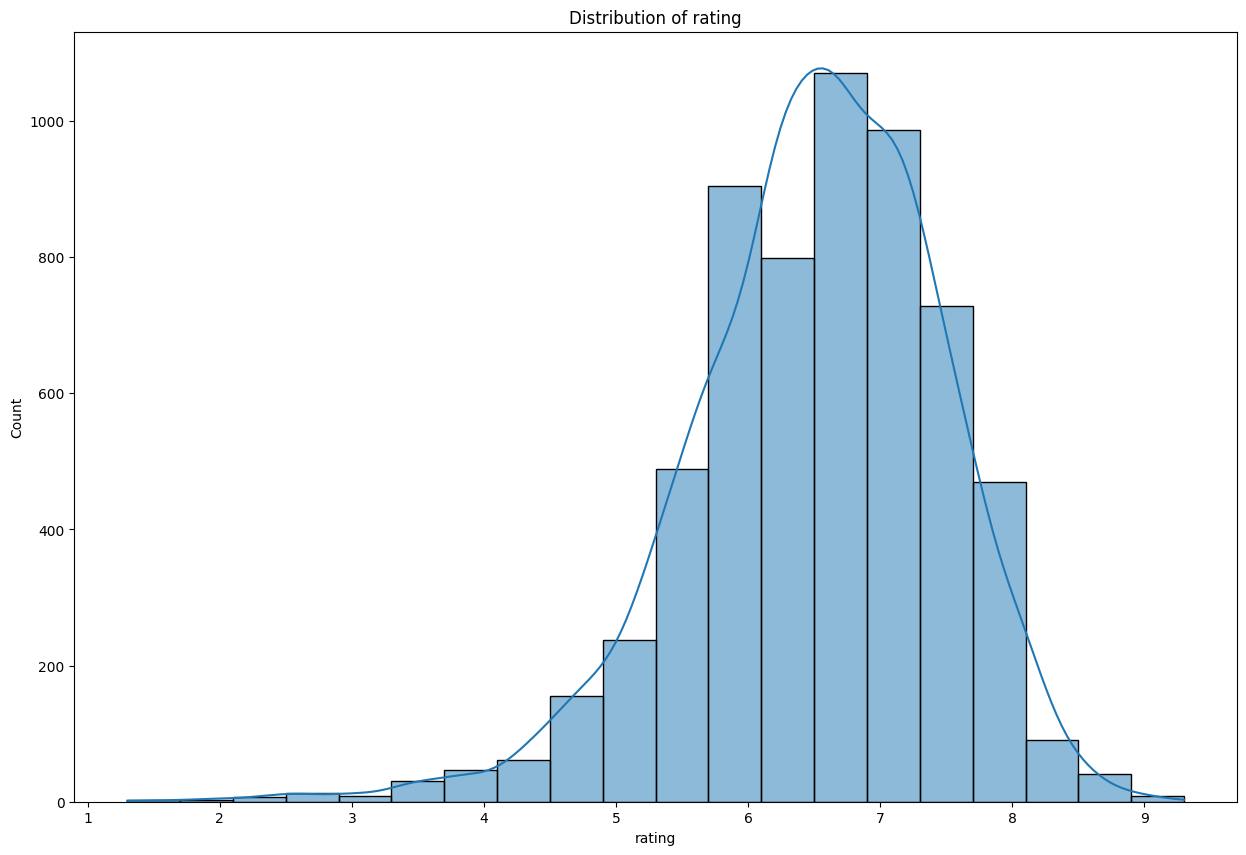

In [28]:
plt.figure(figsize=(15, 10))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of rating')

### Observation: The data is negatively (left) skewed. Maximum count occurs at rating between 6.5 & 7

Text(0.5, 1.0, 'Distribution of Gross Income')

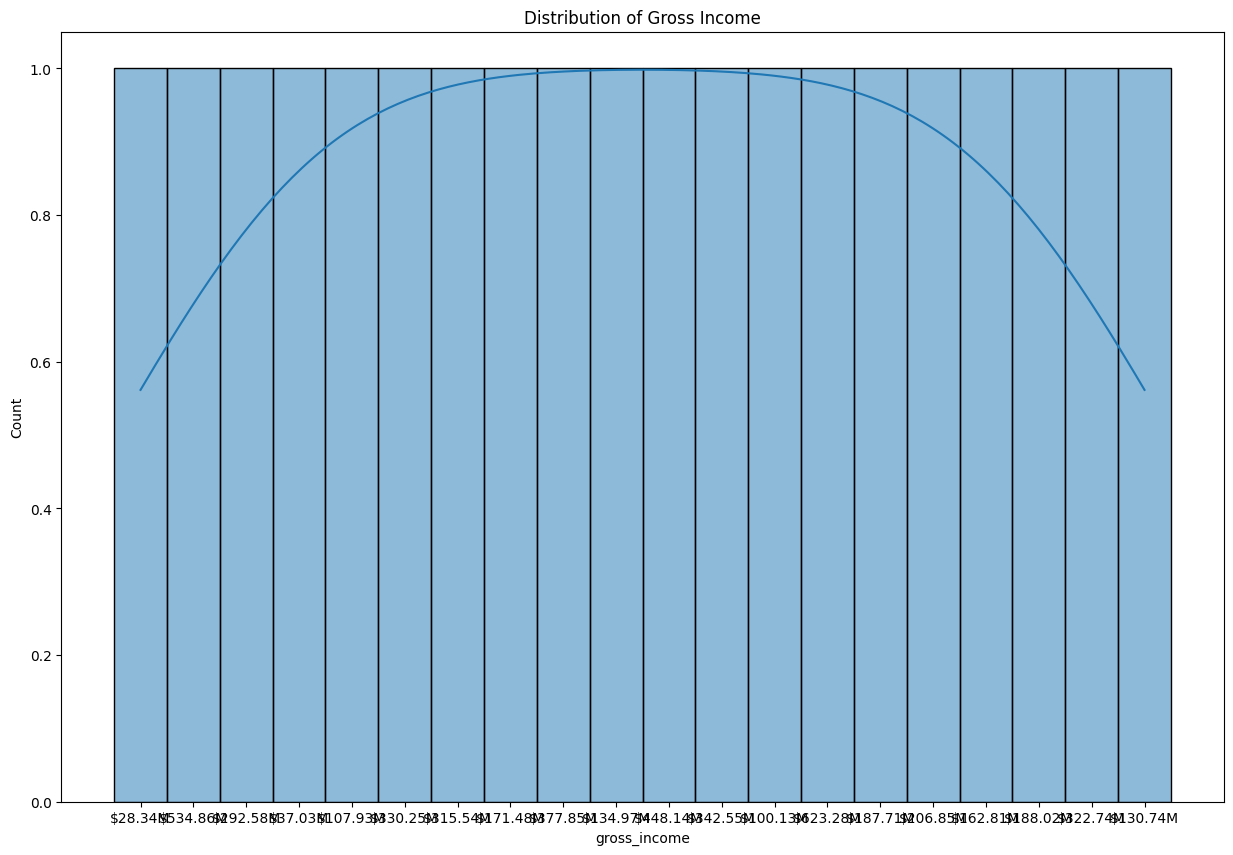

In [29]:
plt.figure(figsize=(15, 10))
sns.histplot(df['gross_income'].head(20), bins=20, kde=True)
plt.title('Distribution of Gross Income')

Text(0.5, 1.0, 'Distribution of votes')

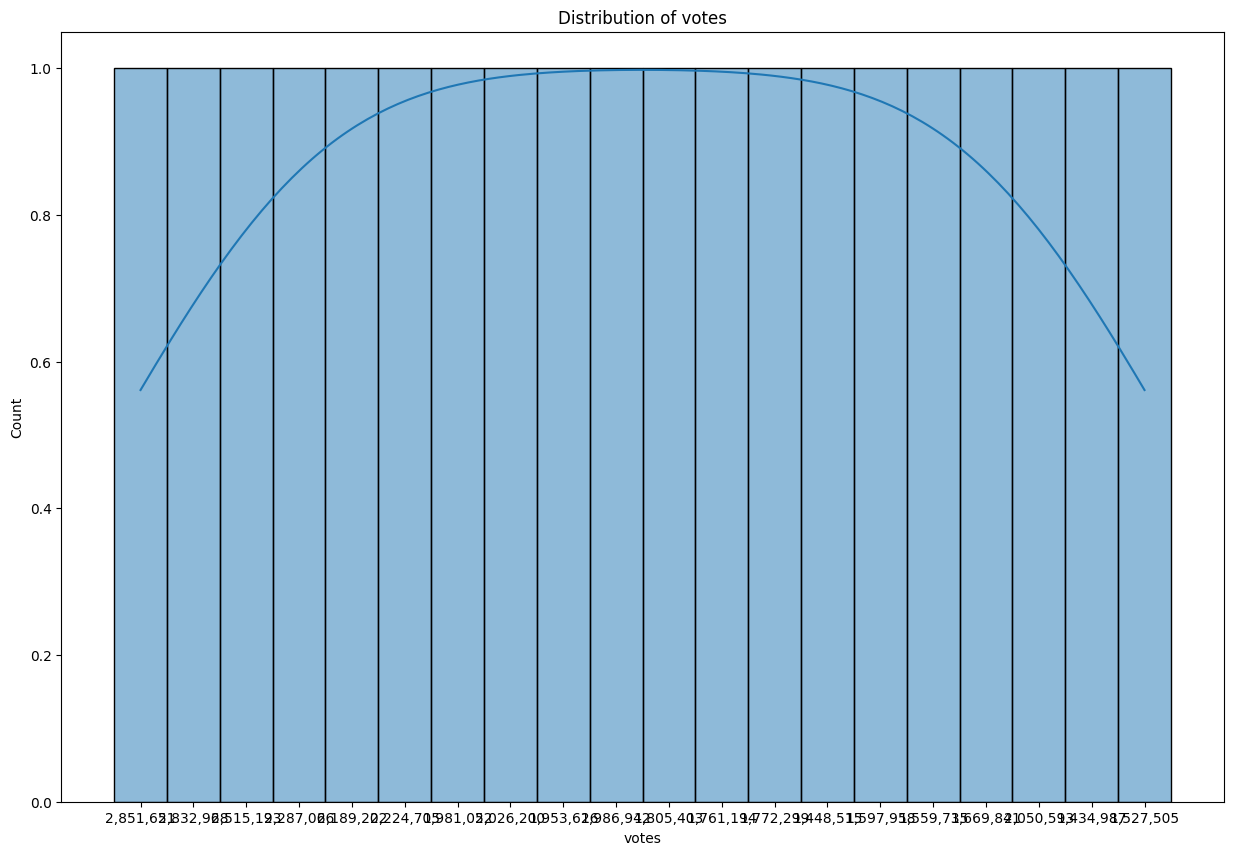

In [30]:
plt.figure(figsize=(15, 10))
sns.histplot(df['votes'].head(20), bins=20, kde=True)
plt.title('Distribution of votes')

## Data Visualization for the categorical features

Text(0.5, 1.0, 'Top 20 Genres')

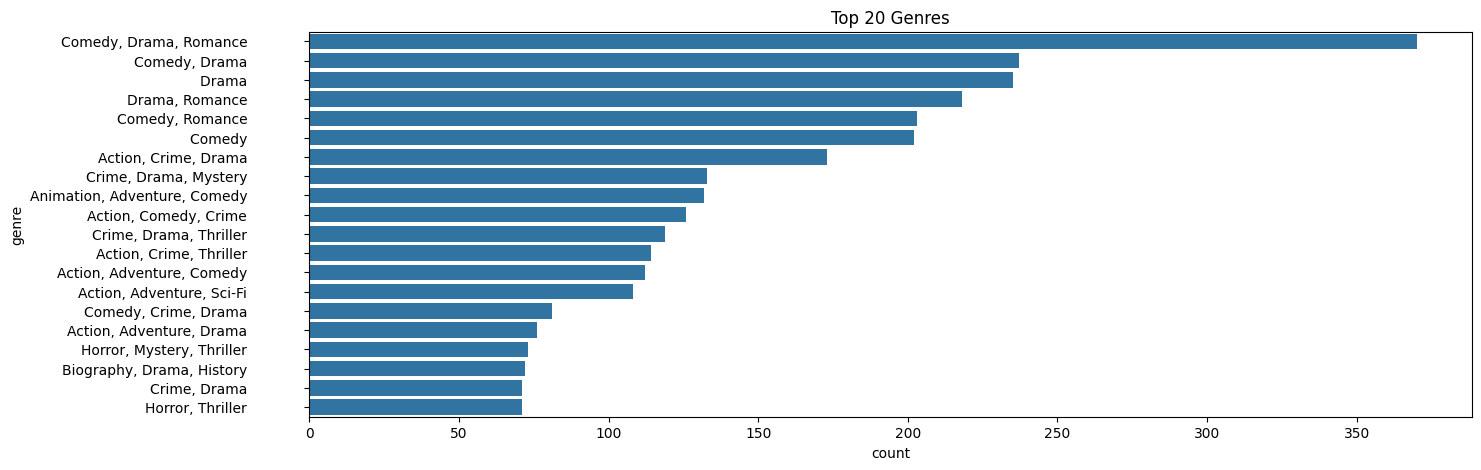

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index[:20])
plt.title('Top 20 Genres')

### Observation: Count (around 370) is maximum for genres Comedy, Drama and Romance & least (around 70) for genres Horror & Thriller.

Text(0.5, 1.0, 'Certificate Distribution')

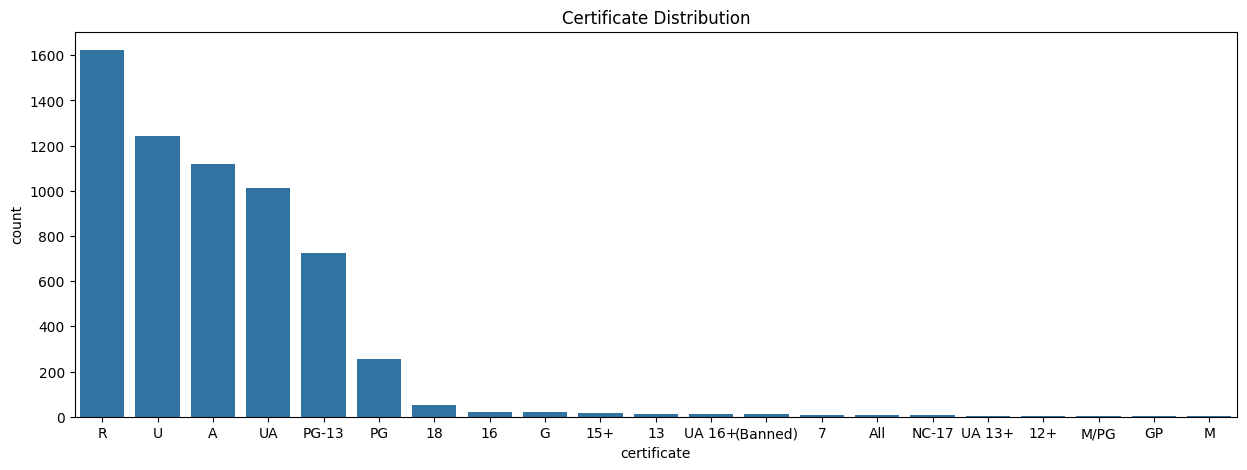

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x='certificate', data=df, order=df['certificate'].value_counts().index)
plt.title('Certificate Distribution')

### Observation: R certificate movies are maximum; that is more than 1600 counts.

Text(0.5, 1.0, 'Top 20 Release Years')

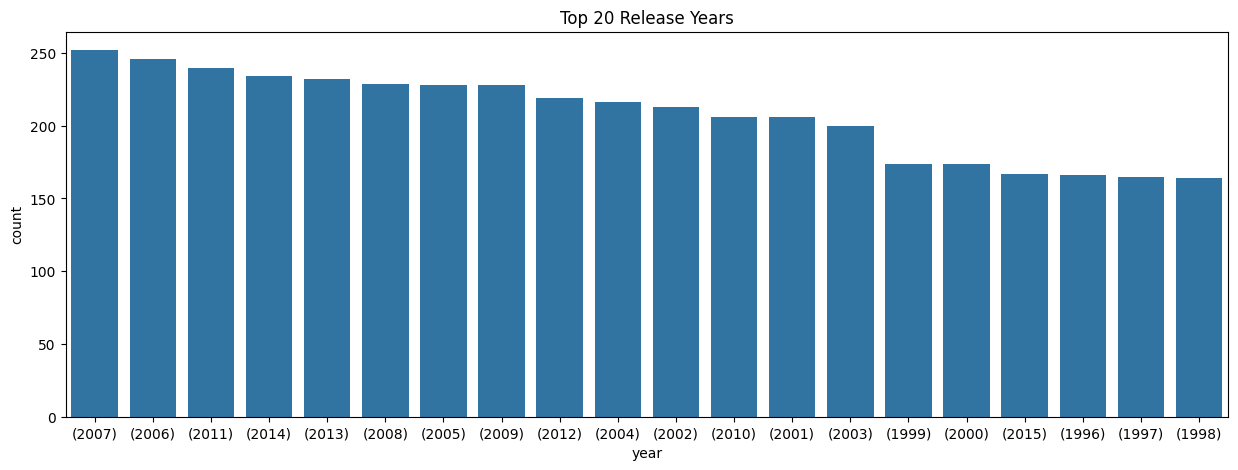

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(x='year', data=df, order=df['year'].value_counts().index[:20])
plt.title('Top 20 Release Years')

### Observation: Maximum number (around 250) of movies were released in the year 2007

Text(0.5, 1.0, 'Top 10 directors')

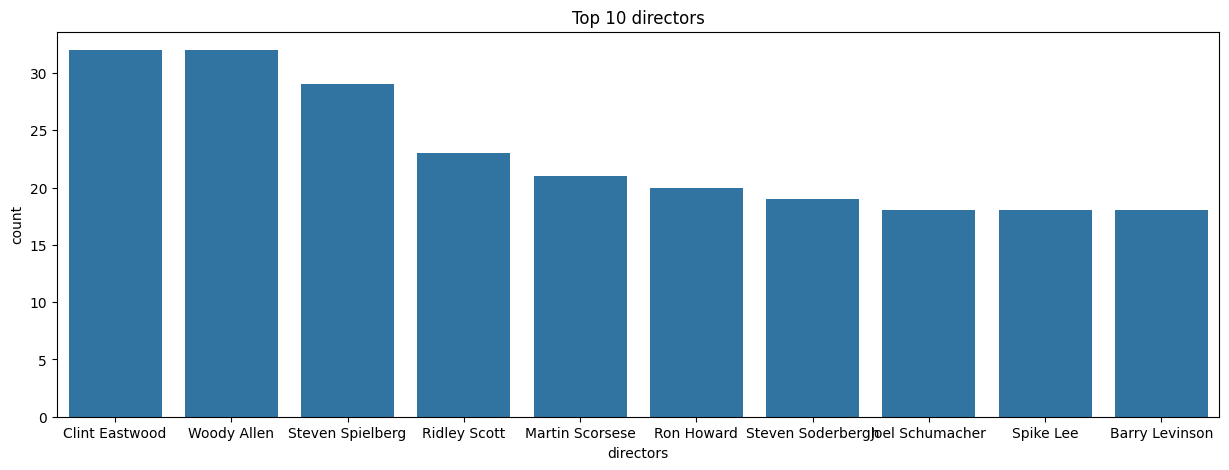

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x='directors', data=df, order=df['directors'].value_counts().index[:10])
plt.title('Top 10 directors')

### Observation: Woddy Allen has directed maximum number of movies (around 35).

## Top 10 movies with the highest rating

In [35]:
df.groupby('movie_name')['rating'].mean().sort_values(ascending=False).head(10)

movie_name
The Shawshank Redemption                             9.3
The Godfather                                        9.2
The Godfather Part II                                9.0
12 Angry Men                                         9.0
Schindler's List                                     9.0
The Dark Knight                                      9.0
The Lord of the Rings: The Return of the King        9.0
Pulp Fiction                                         8.9
The Lord of the Rings: The Fellowship of the Ring    8.9
The Lord of the Rings: The Two Towers                8.8
Name: rating, dtype: float64

### Observation: Movie (The Shawshank Redemption) has the highest rating of 9.3

In [36]:
df.groupby('genre')['gross_income'].count().sort_values(ascending=False)

genre
Comedy, Drama, Romance                     370
Comedy, Drama                              237
Drama                                      235
Drama, Romance                             218
Comedy, Romance                            203
                                          ... 
Adventure, Thriller                          1
Adventure, War, Western                      1
Adventure, Western                           1
Drama, History, Mystery                      1
Adventure, Fantasy, Romance                  1
Name: gross_income, Length: 357, dtype: int64

### Observation: The genres Comedy, Drama & Romance has the highest count of 370

## Top 10 highest genre with the higest gross income

In [37]:
df['gross_income'] = pd.to_numeric(df['gross_income'].replace('[\$,M]', '', regex=True), errors='coerce')
genre_gross_income = df.groupby('genre')['gross_income'].sum()

highest_gross_genre = genre_gross_income.sort_values(ascending=False).head(10)
highest_gross_genre

genre
Animation, Adventure, Comedy                16839.32
Action, Adventure, Sci-Fi                   16553.66
Comedy, Drama, Romance                       9157.99
Comedy                                       8302.84
Comedy, Romance                              8222.51
Action, Adventure, Fantasy                   7033.48
Action, Adventure, Comedy                    6417.64
Action, Comedy, Crime                        5376.84
Action, Adventure, Drama                     5080.92
Action, Adventure, Thriller                  5053.52
Name: gross_income, dtype: float64

### Observation: The genres Animation, Adventure & Comedy has the highest gross income of 16839.32M

## Top 10 movies with the highest votes

In [38]:
df['votes'] = pd.to_numeric(df['votes'].replace('[,]', '', regex=True), errors='coerce')
top_votes_movies = df.sort_values(by='votes', ascending=False).head(10)

print(top_votes_movies[['movie_name', 'votes']])

                                           movie_name    votes
0                            The Shawshank Redemption  2851651
1                                     The Dark Knight  2832968
2                                           Inception  2515193
3                                          Fight Club  2287066
5                                        Forrest Gump  2224705
4                                        Pulp Fiction  2189202
17                                       Interstellar  2050593
7                                          The Matrix  2026200
9                                       The Godfather  1986942
6   The Lord of the Rings: The Fellowship of the Ring  1981052


### Observation: The movie (The Shawshank Redemption) has secured highest votes.

## Top 5 certificate movies which collected the highest gross income

In [39]:
df['gross_income'] = pd.to_numeric(df['gross_income'].replace('[\$,M]', '', regex=True), errors='coerce')
certificate_gross_income = df.groupby('certificate')['gross_income'].sum()
top_certificates = certificate_gross_income.sort_values(ascending=False).head(5)
top_certificates

certificate
U        73004.16
UA       71592.76
A        49499.92
R        14238.43
PG-13    14157.37
Name: gross_income, dtype: float64

### Observation: U certificate movies collected highest gross income of 73004.16M

## Top 5 directors with highest gross income

In [40]:
df['gross_income'] = pd.to_numeric(df['gross_income'].replace('[\$,M]', '', regex=True), errors='coerce')
director_gross_income = df.groupby('directors')['gross_income'].sum()
top_directors = director_gross_income.sort_values(ascending=False).head(5)
top_directors

directors
Steven Spielberg    4284.47
Michael Bay         2196.34
Peter Jackson       2134.38
Robert Zemeckis     2035.84
James Cameron       1948.98
Name: gross_income, dtype: float64

### Observation: Steven Spielberg is the top director with highest gross income of 4284.47M

In [41]:
df1=df.copy()

In [42]:
df1.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,28.34,2851651,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,(2008),9.0,UA,534.86,2832968,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,(2010),8.8,UA,292.58,2515193,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,(1999),8.8,A,37.03,2287066,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,(1994),8.9,A,107.93,2189202,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."


In [43]:
stars_split = df1['stars'].str.split(',', expand=True)

In [44]:
stars_split.columns = [f'Star_{i+1}' for i in range(stars_split.shape[1])]

In [45]:
df1 = pd.concat([df1, stars_split], axis=1)

In [46]:
df1.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars,Star_1,Star_2,Star_3,Star_4
0,The Shawshank Redemption,(1994),9.3,A,28.34,2851651,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ...",Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Dark Knight,(2008),9.0,UA,534.86,2832968,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha...",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,Inception,(2010),8.8,UA,292.58,2515193,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ...",Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
3,Fight Club,(1999),8.8,A,37.03,2287066,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach...",Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier
4,Pulp Fiction,(1994),8.9,A,107.93,2189202,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac...",John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis


In [47]:
df1=df1.drop('stars',axis=1)

In [48]:
df1

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,Star_1,Star_2,Star_3,Star_4
0,The Shawshank Redemption,(1994),9.3,A,28.34,2851651,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Dark Knight,(2008),9.0,UA,534.86,2832968,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,Inception,(2010),8.8,UA,292.58,2515193,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
3,Fight Club,(1999),8.8,A,37.03,2287066,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier
4,Pulp Fiction,(1994),8.9,A,107.93,2189202,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,Box of Moonlight,(1996),7.1,R,0.72,5986,112 min,"Comedy, Drama","An engineer finds his first gray hair, takes 6...",Tom DiCillo,John Turturro,Sam Rockwell,Catherine Keener,Lisa Blount
6423,Breakin',(1984),5.8,U,38.68,7140,87 min,"Comedy, Drama, Music",A struggling young jazz dancer meets up with t...,Joel Silberg,Lucinda Dickey,Adolfo Quinones,Michael Chambers,Ben Lokey
6424,Extreme Prejudice,(1987),6.6,A,11.31,8597,105 min,"Action, Crime, Drama",A Texas Ranger and a ruthless narcotics kingpi...,Walter Hill,Nick Nolte,Powers Boothe,Michael Ironside,Maria Conchita Alonso
6425,The Sixth Man,(1997),5.7,PG-13,14.71,6262,107 min,"Comedy, Drama, Fantasy",A college athlete returns from the dead to hel...,Randall Miller,Marlon Wayans,Kadeem Hardison,David Paymer,Michael Michele


In [49]:
df1.values[0]

array(['The Shawshank Redemption', '(1994)', 9.3, 'A', 28.34, 2851651,
       '142 min', 'Drama            ',
       'Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.',
       'Frank Darabont', '     Tim Robbins', ' Morgan Freeman',
       ' Bob Gunton', ' William Sadler'], dtype=object)

## Vectorization

In [50]:
df2=df.copy()
df2.head()

,movie_name,year,rating,certificate,gross_income,votes,runtime,genre,description,directors,stars
0,The Shawshank Redemption,(1994),9.3,A,28.34,2851651,142 min,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,(2008),9.0,UA,534.86,2832968,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,(2010),8.8,UA,292.58,2515193,148 min,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,(1999),8.8,A,37.03,2287066,139 min,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,(1994),8.9,A,107.93,2189202,154 min,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6153 entries, 0 to 6426
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_name    6153 non-null   object 
 1   year          6153 non-null   object 
 2   rating        6153 non-null   float64
 3   certificate   6153 non-null   object 
 4   gross_income  6153 non-null   float64
 5   votes         6153 non-null   int64  
 6   runtime       6153 non-null   object 
 7   genre         6153 non-null   object 
 8   description   6153 non-null   object 
 9   directors     6153 non-null   object 
 10  stars         6153 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 576.8+ KB


In [52]:
df2=df2.drop(['year','rating','gross_income','votes','runtime'],axis=1)

In [53]:
df2.head()

,movie_name,certificate,genre,description,directors,stars
0,The Shawshank Redemption,A,Drama,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,UA,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,UA,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,A,Drama,An insomniac office worker and a devil-may-car...,David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,A,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."


### Converting description column into list

In [54]:
df2['description']=df2['description'].apply(lambda x:x.split())

In [55]:
df2.head()

,movie_name,certificate,genre,description,directors,stars
0,The Shawshank Redemption,A,Drama,"[Over, the, course, of, several, years,, two, ...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,The Dark Knight,UA,"Action, Crime, Drama","[When, the, menace, known, as, the, Joker, wre...",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckha..."
2,Inception,UA,"Action, Adventure, Sci-Fi","[A, thief, who, steals, corporate, secrets, th...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, ..."
3,Fight Club,A,Drama,"[An, insomniac, office, worker, and, a, devil-...",David Fincher,"Brad Pitt, Edward Norton, Meat Loaf, Zach..."
4,Pulp Fiction,A,"Crime, Drama","[The, lives, of, two, mob, hitmen,, a, boxer,,...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jac..."


### Converting all column into list

In [56]:
df2['directors'] = df2['directors'].apply(lambda x: x.replace(" ", "").split(','))
df2['stars'] = df2['stars'].apply(lambda x: x.replace(" ", "").split(','))
df2['genre'] = df2['genre'].apply(lambda x: x.replace(" ", "").split(','))
df2['certificate'] = df2['certificate'].apply(lambda x: x.replace(" ", "").split(','))
df2.head()

,movie_name,certificate,genre,description,directors,stars
0,The Shawshank Redemption,[A],[Drama],"[Over, the, course, of, several, years,, two, ...",[FrankDarabont],"[TimRobbins, MorganFreeman, BobGunton, William..."
1,The Dark Knight,[UA],"[Action, Crime, Drama]","[When, the, menace, known, as, the, Joker, wre...",[ChristopherNolan],"[ChristianBale, HeathLedger, AaronEckhart, Mic..."
2,Inception,[UA],"[Action, Adventure, Sci-Fi]","[A, thief, who, steals, corporate, secrets, th...",[ChristopherNolan],"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot..."
3,Fight Club,[A],[Drama],"[An, insomniac, office, worker, and, a, devil-...",[DavidFincher],"[BradPitt, EdwardNorton, MeatLoaf, ZachGrenier]"
4,Pulp Fiction,[A],"[Crime, Drama]","[The, lives, of, two, mob, hitmen,, a, boxer,,...",[QuentinTarantino],"[JohnTravolta, UmaThurman, SamuelL.Jackson, Br..."


### Creating new column df2['overall']. Which combines the values from the certificate,genre,description,directors,stars

In [57]:
df2['overall']=df2['description'] + df2['genre'] + df2['certificate'] + df2['stars'] + df2['directors']
df2.head()

,movie_name,certificate,genre,description,directors,stars,overall
0,The Shawshank Redemption,[A],[Drama],"[Over, the, course, of, several, years,, two, ...",[FrankDarabont],"[TimRobbins, MorganFreeman, BobGunton, William...","[Over, the, course, of, several, years,, two, ..."
1,The Dark Knight,[UA],"[Action, Crime, Drama]","[When, the, menace, known, as, the, Joker, wre...",[ChristopherNolan],"[ChristianBale, HeathLedger, AaronEckhart, Mic...","[When, the, menace, known, as, the, Joker, wre..."
2,Inception,[UA],"[Action, Adventure, Sci-Fi]","[A, thief, who, steals, corporate, secrets, th...",[ChristopherNolan],"[LeonardoDiCaprio, JosephGordon-Levitt, Elliot...","[A, thief, who, steals, corporate, secrets, th..."
3,Fight Club,[A],[Drama],"[An, insomniac, office, worker, and, a, devil-...",[DavidFincher],"[BradPitt, EdwardNorton, MeatLoaf, ZachGrenier]","[An, insomniac, office, worker, and, a, devil-..."
4,Pulp Fiction,[A],"[Crime, Drama]","[The, lives, of, two, mob, hitmen,, a, boxer,,...",[QuentinTarantino],"[JohnTravolta, UmaThurman, SamuelL.Jackson, Br...","[The, lives, of, two, mob, hitmen,, a, boxer,,..."


### Creating a new data frame which contain only the movie_name and the new column 'overall'

In [58]:
df3=df2[['movie_name','overall']]
df3

,movie_name,overall
0,The Shawshank Redemption,"[Over, the, course, of, several, years,, two, ..."
1,The Dark Knight,"[When, the, menace, known, as, the, Joker, wre..."
2,Inception,"[A, thief, who, steals, corporate, secrets, th..."
3,Fight Club,"[An, insomniac, office, worker, and, a, devil-..."
4,Pulp Fiction,"[The, lives, of, two, mob, hitmen,, a, boxer,,..."
...,...,...
6422,Box of Moonlight,"[An, engineer, finds, his, first, gray, hair,,..."
6423,Breakin',"[A, struggling, young, jazz, dancer, meets, up..."
6424,Extreme Prejudice,"[A, Texas, Ranger, and, a, ruthless, narcotics..."
6425,The Sixth Man,"[A, college, athlete, returns, from, the, dead..."


### Converting the 'overall' list into string

In [59]:
df3["overall"] = df3["overall"].apply(lambda x: ' '.join(x))

In [60]:
df3.head()

,movie_name,overall
0,The Shawshank Redemption,"Over the course of several years, two convicts..."
1,The Dark Knight,When the menace known as the Joker wreaks havo...
2,Inception,A thief who steals corporate secrets through t...
3,Fight Club,An insomniac office worker and a devil-may-car...
4,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst..."


### Converting 'overall' into lower case

In [61]:
df3["overalls"] = df3["overall"].apply(lambda x: x.lower())

In [62]:
df3.head()

,movie_name,overall,overalls
0,The Shawshank Redemption,"Over the course of several years, two convicts...","over the course of several years, two convicts..."
1,The Dark Knight,When the menace known as the Joker wreaks havo...,when the menace known as the joker wreaks havo...
2,Inception,A thief who steals corporate secrets through t...,a thief who steals corporate secrets through t...
3,Fight Club,An insomniac office worker and a devil-may-car...,an insomniac office worker and a devil-may-car...
4,Pulp Fiction,"The lives of two mob hitmen, a boxer, a gangst...","the lives of two mob hitmen, a boxer, a gangst..."


In [63]:
df3 = df3.drop('overall', axis=1)

In [64]:
df3.head()

,movie_name,overalls
0,The Shawshank Redemption,"over the course of several years, two convicts..."
1,The Dark Knight,when the menace known as the joker wreaks havo...
2,Inception,a thief who steals corporate secrets through t...
3,Fight Club,an insomniac office worker and a devil-may-car...
4,Pulp Fiction,"the lives of two mob hitmen, a boxer, a gangst..."


### Converting the repeated words into a specific name if loved and loving and lover etc they are consider as love

In [65]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sachin
[nltk_data]     Sampath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
ps = PorterStemmer()

In [67]:
df3["overalls"] = df3["overalls"].apply(lambda text: " ".join([ps.stem(word) for word in nltk.word_tokenize(text)]))

In [68]:
df3['overalls'][0]

'over the cours of sever year , two convict form a friendship , seek consol and , eventu , redempt through basic compass . drama a timrobbin morganfreeman bobgunton williamsadl frankdarabont'

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
cv= CountVectorizer(stop_words='english', max_features=7000)

In [71]:
cv.fit_transform(df3["overalls"]).toarray().shape

(6153, 7000)

In [72]:
vectors=cv.fit_transform(df3['overalls']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Cosine similarity

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

In [75]:
cosine_similarity(vectors)

array([[1.        , 0.0496904 , 0.        , ..., 0.06454972, 0.05773503,
        0.12909944],
       [0.0496904 , 1.        , 0.1675063 , ..., 0.14433757, 0.0860663 ,
        0.06415003],
       [0.        , 0.1675063 , 1.        , ..., 0.04351941, 0.11677484,
        0.        ],
       ...,
       [0.06454972, 0.14433757, 0.04351941, ..., 1.        , 0.0559017 ,
        0.08333333],
       [0.05773503, 0.0860663 , 0.11677484, ..., 0.0559017 , 1.        ,
        0.0745356 ],
       [0.12909944, 0.06415003, 0.        , ..., 0.08333333, 0.0745356 ,
        1.        ]])

In [76]:
cosine_similarity(vectors).shape

(6153, 6153)

In [77]:
similarity = cosine_similarity(vectors)

In [78]:
sorted(list (enumerate(similarity[0])), reverse=True ,key=lambda x: x[1])[1:6]

[(5773, 0.25048971643405976),
 (6027, 0.2449489742783178),
 (1931, 0.21535276082326618),
 (4279, 0.20701966780270625),
 (5480, 0.20701966780270625)]

In [79]:
def recommend(movie):

  movie_index= df3[df3["movie_name"]== movie].index[0]
  distances= similarity[movie_index]
  movies_list = sorted(list (enumerate(distances)), reverse=True ,key=lambda x: x[1])[1:11]

  for i in movies_list:
    print(df3.iloc[i[0]].movie_name)

### Checking Recommendation

In [80]:
recommend('Fight Club')

Never Back Down
Bread and Roses
Kal Hee
The Full Monty
The Curious Case of Benjamin Button
Man of Tai Chi
Gloria
Spare Parts
The Devil's Own
Beasts of No Nation


In [81]:
df3

,movie_name,overalls
0,The Shawshank Redemption,"over the cours of sever year , two convict for..."
1,The Dark Knight,when the menac known as the joker wreak havoc ...
2,Inception,a thief who steal corpor secret through the us...
3,Fight Club,an insomniac offic worker and a devil-may-car ...
4,Pulp Fiction,"the live of two mob hitmen , a boxer , a gangs..."
...,...,...
6422,Box of Moonlight,"an engin find hi first gray hair , take 6 day ..."
6423,Breakin',a struggl young jazz dancer meet up with two b...
6424,Extreme Prejudice,a texa ranger and a ruthless narcot kingpin - ...
6425,The Sixth Man,a colleg athlet return from the dead to help h...
